# Data Mining Techniques
This notebook demonstrates two data mining techniques on the finance dataset: clustering (K-Means) and anomaly detection (Isolation Forest).

## 1. Clustering with K-Means
We will use K-Means to group similar records in the dataset based on their numeric features.

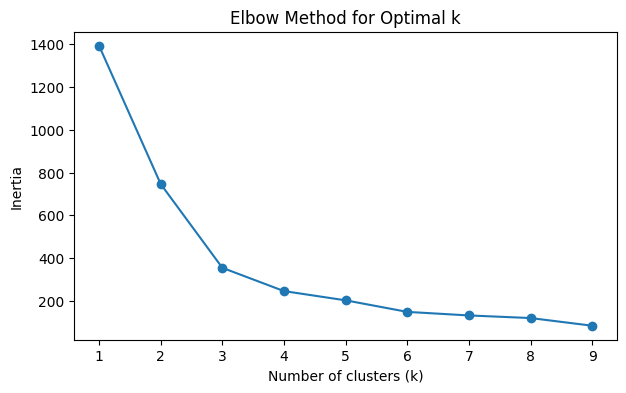

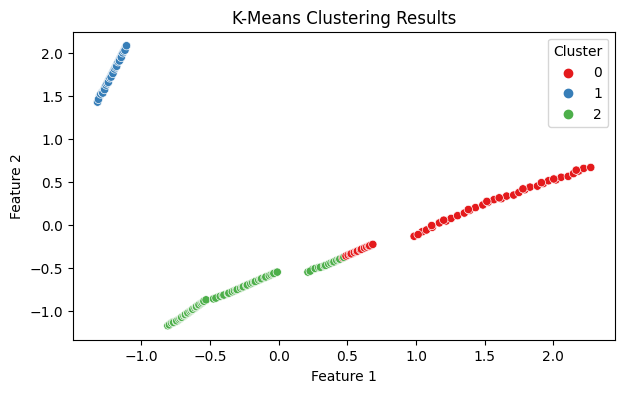

In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned finance dataset
df = pd.read_csv('../data/transformed/Final/cleaned_finance_dataset.csv')

# Select numeric columns for clustering
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_cols].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit KMeans with chosen k (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Visualize clusters using the first two features
plt.figure(figsize=(7,4))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters, palette='Set1')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

## 2. Anomaly Detection with Isolation Forest
We will use Isolation Forest to identify outliers in the dataset.

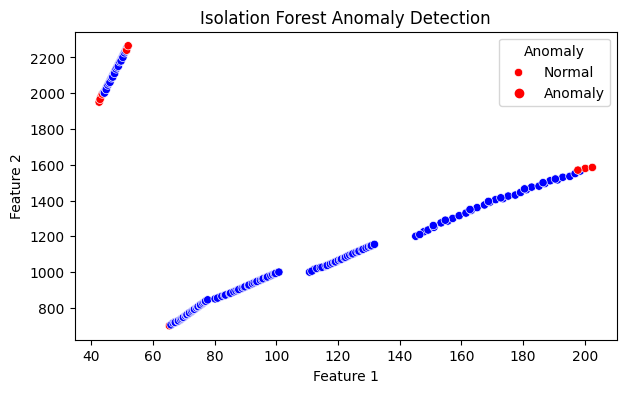

In [2]:
# Import Isolation Forest
from sklearn.ensemble import IsolationForest

# Use the same numeric features as before
# (Assume X and numeric_cols are already defined from previous cell)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomaly_labels = iso_forest.fit_predict(X)

# Add anomaly labels to the dataframe (-1: anomaly, 1: normal)
df['Anomaly'] = anomaly_labels

# Visualize anomalies using the first two features
plt.figure(figsize=(7,4))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=df['Anomaly'], palette={1:'blue', -1:'red'})
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Anomaly', labels=['Normal','Anomaly'])
plt.show()